In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\FA0555TX\\Downloads\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [6]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

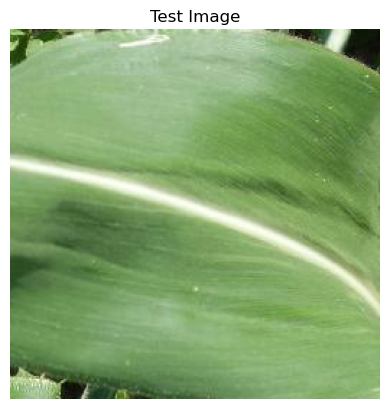

In [25]:
import cv2
import matplotlib.pyplot as plt

image_path = 'C:\\Users\\FA0555TX\\Downloads\\test_image.jpg'

# Load the image
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Convert BGR to RGB for correct color display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('Test Image')
    plt.axis('off')
    plt.show()


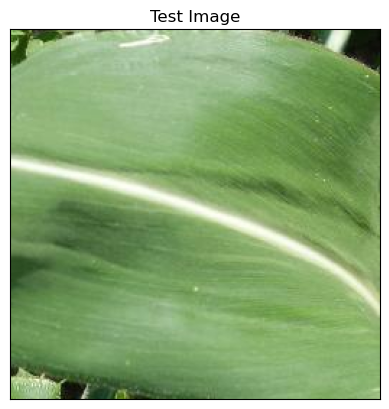

In [26]:
#Test Image Visualization
import cv2
image_path = 'C:\\Users\\FA0555TX\\Downloads\\test_image.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step


In [28]:
print(predictions)

[[2.49450704e-06 2.80809902e-12 2.39285987e-11 2.94838265e-10
  1.69618972e-11 7.00473624e-10 9.79214106e-13 1.68663591e-05
  9.33781394e-07 1.48909994e-05 9.99962926e-01 1.22696227e-15
  6.61959975e-15 5.15440248e-16 7.85204887e-12 1.81755472e-10
  6.99379541e-08 3.96125133e-10 1.07882521e-13 5.22118127e-09
  2.10080010e-15 2.75950307e-14 2.43432208e-08 2.05639244e-13
  2.34425044e-12 7.19491311e-08 3.09795134e-10 5.16694807e-14
  1.00173545e-13 4.48564421e-08 1.79550284e-06 2.34146090e-13
  1.92015688e-13 1.12668276e-18 1.15832416e-14 2.62089151e-13
  6.81185294e-15 3.51103613e-13]]


In [29]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

10


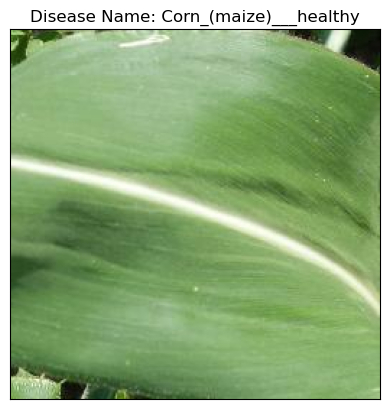

In [30]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()